<a href="https://colab.research.google.com/github/baur-mukhamet/shakespeare-gpt2/blob/main/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/gpt_from_scratch

Mounted at /content/drive
/content/drive/MyDrive/gpt_from_scratch


In [3]:
from utils import plot_losses

# Character-level language model

**First we train simple, next character prediction, models**

In [ ]:
%run run.py \
--'chrs' \
--batch_size 32 \
--block_size 128 \
--num_epochs 100 \
--learning_rates 1e-3 \
--weight_decays 1\
--dropouts 0.2 \
--save_losses \
--save_checkpoint \
--run_dir "./cosine_schedule" \
--lr_schedule 'cosine' \
--cosine_final_lr 1e-8 \
--cosine_T_max 100 \

**With constant learning rate the best run is**

Best eval loss:  1.4795666805335455
Best checkpoint: 207754
{'num_epochs': 50, 'batch_size': 32, 'eval_steps': 2000, 'learning_rate': 0.001, 'weight_decay': 1.0}
{'vocab_size': 65, 'n_blocks': 6, 'n_emb': 384, 'n_heads': 6, 'block_size': 128, 'dropout': 0.1}


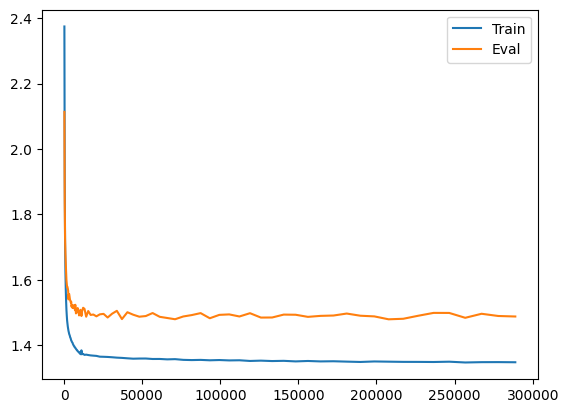

In [ ]:
plot_losses('./best_trained_models/chrs/const_lr')

**With cosine learning rate schedule the best run is**

Best eval loss:  1.460944311959403
Best checkpoint: 15042
{'num_epochs': 100, 'batch_size': 32, 'eval_steps': 2000, 'learning_rate': 0.001, 'weight_decay': 1.0}
{'vocab_size': 65, 'n_blocks': 6, 'n_emb': 384, 'n_heads': 6, 'block_size': 128, 'dropout': 0.2}


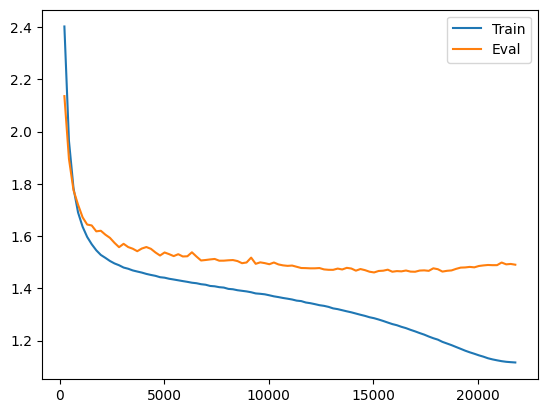

In [ ]:
plot_losses('./best_trained_models/chrs/cos_lr')

In [8]:
%run generate.py './best_trained_models/chrs/cos_lr' \
--checkpoint_step 68 \
--max_new_tokens 1000

  0%|          | 0/1000 [00:00<?, ?it/s]


Whiteed, if fear mark to yoe appear the gates?

LADY GREY:
Ay, for her: this is it prepared;
For then foul recure and more than his was office:
Break to Bolingbroke, garland, and I'll all like him:
So I for hand as by the country, and chmonal
To his land.

First Murderer:
Nay so.

MERCUTIO:
Thou he is hadst adon; I :
The lord of his beatness shall give a me thy servant,
That art work, he had, for that news is son the sense
That honour, at fly out in his child, for it o,
And: what she say you hear not by defence,
that he had weepper in the vow, are stland
To me, 'tis not more.

MENENIUS:
I lookd to be content, therefore.
Give me the princely. Women, thy affect will not ourself
Thy fight in his chamber with the oracle doth flow
It is such for surfeit. The war he malice:
Let us for your naked conken:
But true escount in mine, the certain I could
Then have gone.

Most reconcil Montague.

SICINIUS:
Thou ament fre rest, never was not by: Mantua?

MERCUTIO:
Not I, my lord.

CORIOLANUS:
Tell 

In [9]:
%run generate.py './best_trained_models/chrs/const_lr' \
--checkpoint_step 42 \
--max_new_tokens 1000

  0%|          | 0/1000 [00:00<?, ?it/s]


You, be summers: she, watched to young and with us,
I conjoin were have slilt with done, tell you,
As I to your heart were in the old the moie;
You. Then transfore you would be cry we nor
Tly lords, the informent,must I have, unless
To me; and curs.

LEONTES:
Hath rather youth I am
All you a yield! what's you? You have a heavy
Thou knows the mind.

POMPHEY:
To see messence,
Why is not each in thy worst blood.

LULIONMENE:
I has lbanished in thee tears.

ANGELEO:

Man:
I lord, lord,
Though I see the queen of all Gonusage,
I would rather as I to bare the master,
For despise, 'tis a ming of loveous you;
Are me of it you unto die
Your rage means appliant and Leonton;
How we must become well keep his evils,
And breaking your hand to be thus toan.

HENRY BOLINGBROKE:
But loot! thou puls' queen her husband:
To go weep thy this answer to the place.

GLOUCESTER:
Work, sir, our son. Thee duke Henry, un just!

curse:
I pronounce, or so bnarrel brows and lie the crown;
Good madmory whkill
To conc

# Byte-Pair Encoding tokenizer

**Now we train with a more sophisticated tokenizer, taken from Andrey Karpathy's reimplementation of OpenAI tokenzier [minGPT](https://github.com/karpathy/minGPT/tree/master)**

In [ ]:
%run run.py \
--tokenizer_type 'bpe' \
--batch_sizes 32 \
--block_sizes 128 \
--num_epochs 100 \
--learning_rates 1e-4 \
--weight_decays 3 \
--dropouts 0.2 \
--save_losses \
--save_checkpoint \
--run_dir "./long_run_cos_lr1e-4" \
--lr_schedule 'cosine' \
--cosine_final_lr 1e-8 \
--cosine_T_max 100

Best eval loss:  4.365200254652235
Best checkpoint: 94
{'num_epochs': 100, 'batch_size': 32, 'learning_rate': 0.0001, 'weight_decay': 3.0}
{'vocab_size': 50257, 'n_blocks': 6, 'n_emb': 384, 'n_heads': 6, 'block_size': 128, 'dropout': 0.2}


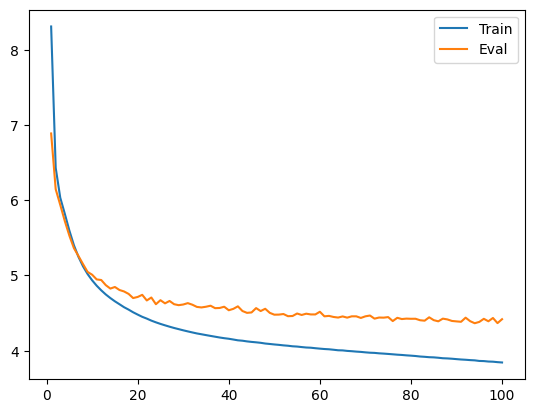

In [4]:
plot_losses("./best_trained_models/bpe/const_lr")

Best eval loss:  3.5625376171535916
Best checkpoint: 304
{'num_epochs': 100, 'batch_size': 32, 'learning_rate': 5e-06, 'weight_decay': 3.0}
{'vocab_size': 50257, 'n_blocks': 6, 'n_emb': 384, 'n_heads': 6, 'block_size': 128, 'dropout': 0.2}


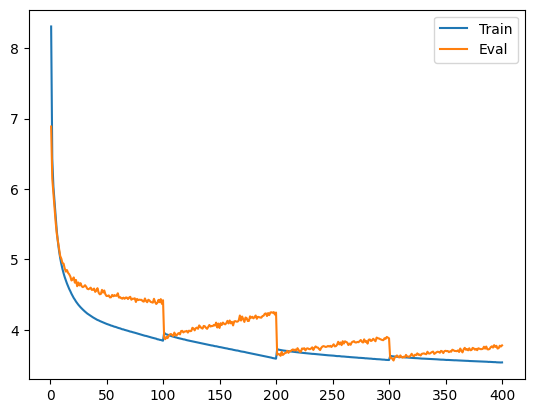

In [5]:
plot_losses("./best_trained_models/bpe/lr_step_decay")

In [7]:
%run generate.py "./best_trained_models/bpe/lr_step_decay" \
--tokenizer_type 'bpe' \
--checkpoint_step 304 \
--max_new_tokens 500

  0%|          | 0/500 [00:00<?, ?it/s]

!
We was dared to his father, but, report
Your all any great death: I have eve.

CALUS:
It was at the king, 'twere now, for this;
It sends she: eat what's, to heaven,--
Come, sir,Need boast his weeds oftenBR
3 KING sore distribution, lend him

MEN highumentle
Thus his five men,
We shall follow him.
ThirdBeing nor;

CORIUS:
Nightless soil, are too now we depsal robbers into
Betw got in charity; for they shall of
the home: woodency, and yet he is it hence,
You never sh E miscar councils, to be most one thing,

To answer the traitors and unhappy, rel withheld.

First wealsdigy,
We, Marcius the Lord:
'ld never lacks truth that nothing of the memory,
His inherunes answer'd by the present sight o' the
Of the coronible: believe, here, that
Which we do eyedoser, but had esteemfully,
Our which weeps by his impartial sides priixt his
Upon my kindred years to a woman's model of saw,
Groyet fear not winter love;BIANDA:
Sweet nurse, by you have,
Or courOf then, their garments, meets far have soarse